# Importing libraries

In [1]:
import pandas as pd
import numpy as np

# Reading data

In [2]:
data=pd.read_csv("supply_chain_train.csv")
pd.set_option('display.max_columns', None)
data.head()

,train_idx,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,0,713071383,54,F,1,Unknown,Single,Unknown,Blue,36,1,3,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,1,714246333,58,F,4,High School,Married,Unknown,Blue,48,1,4,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,2,718206783,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,1,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,3,721096983,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,3,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,4,720028683,49,F,2,High School,Married,$40K - $60K,Blue,39,5,3,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1


In [3]:
data.shape

(8101, 22)

In [4]:
data.columns

Index(['train_idx', 'CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag'],
      dtype='object')

In [5]:
print(data.isnull().sum())

train_idx                   0
CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64


In [6]:
print(data.isna().sum())

train_idx                   0
CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64


# Processsing data.

In [7]:
data.Gender.unique()

array(['F', 'M'], dtype=object)

In [8]:
map_value={'F':1,'M':0}
data['cat_gender']=data['Gender'].replace(map_value)

In [9]:
data.Education_Level.unique()

array(['Unknown', 'High School', 'Graduate', 'Doctorate', 'Post-Graduate',
       'Uneducated', 'College'], dtype=object)

In [10]:
Edu_Level=data["Education_Level"]
# print(Edu_Level.head())
# print(".--.--.--.--.--")
value_map = {'Unknown': 1, 'High School': 2, 'Graduate': 3,'Doctorate':4,'Post-Graduate':5,'Uneducated':6
            ,'College':7}
data['cat_edu'] = data['Education_Level'].replace(value_map)
print(data.cat_edu.head())

0    1
1    2
2    1
3    3
4    2
Name: cat_edu, dtype: int64


In [11]:
data.Marital_Status.unique()

array(['Single', 'Married', 'Divorced', 'Unknown'], dtype=object)

In [12]:
# print(data.Marital_Status.head())
# print(".--.--.--.--")
value_map={'Single':1, 'Married':2, 'Divorced':3, 'Unknown':4}
data["cat_mstatus"]=data['Marital_Status'].replace(value_map)
print(data.cat_mstatus.head())

0    1
1    2
2    1
3    1
4    2
Name: cat_mstatus, dtype: int64


In [13]:
data.Income_Category.unique()

array(['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K',
       '$80K - $120K', '$120K +'], dtype=object)

In [14]:
# print(data.Income_Category.head())
# print('.--.--.--.--')
map_value={'Unknown':1, 'Less than $40K':2, '$40K - $60K':3, '$60K - $80K':4,
       '$80K - $120K':5, '$120K +':6}
data['cat_income']=data['Income_Category'].replace(map_value)
print(data.cat_income.head())

0    1
1    1
2    2
3    2
4    3
Name: cat_income, dtype: int64


In [15]:
data.Card_Category.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [16]:
# print(data.Card_Category.head())
# print(".--.--.--.--")
map_value={'Blue':1, 'Gold':2, 'Silver':3, 'Platinum':4}
data['cat_cardc']=data['Card_Category'].replace(map_value)
print(data.cat_cardc.head())

0    1
1    1
2    2
3    1
4    1
Name: cat_cardc, dtype: int64


In [17]:
data.columns

Index(['train_idx', 'CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag', 'cat_gender', 'cat_edu', 'cat_mstatus', 'cat_income',
       'cat_cardc'],
      dtype='object')

In [18]:
data_cat=data.drop(['train_idx','Gender','Education_Level', 'Marital_Status','Card_Category', 'Income_Category'],axis=1)
data_cat.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag,cat_gender,cat_edu,cat_mstatus,cat_income,cat_cardc
0,713071383,54,1,36,1,3,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1,1,1,1,1,1
1,714246333,58,4,48,1,4,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0,1,2,2,1,1
2,718206783,45,4,36,6,1,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1,1,1,1,2,2
3,721096983,34,2,36,4,3,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1,1,3,1,2,1
4,720028683,49,2,39,5,3,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1,1,2,2,3,1


In [19]:
print(data_cat.dtypes)

CLIENTNUM                     int64
Customer_Age                  int64
Dependent_count               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Attrition_Flag                int64
cat_gender                    int64
cat_edu                       int64
cat_mstatus                   int64
cat_income                    int64
cat_cardc                     int64
dtype: object


# Basic EDA

In [20]:
data_cat.Attrition_Flag.value_counts()

1    6801
0    1300
Name: Attrition_Flag, dtype: int64

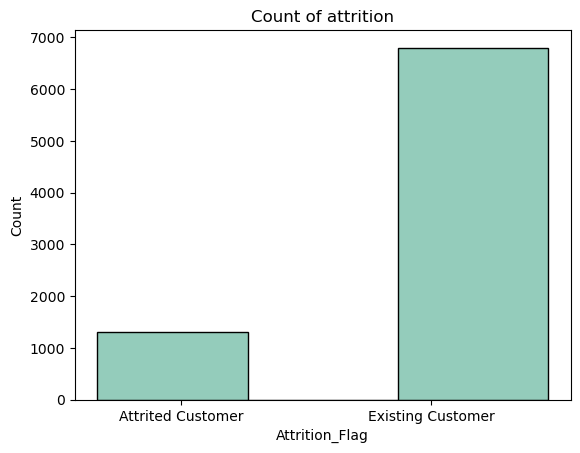

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=data_cat, x='Attrition_Flag', bins=2, binwidth=0.45, color='#71bca5')
plt.xticks([0.25, 1], ['Attrited Customer', 'Existing Customer'])
plt.title('Count of attrition')

plt.show()

We have unbalanced data

In [22]:
correlation_matrix = data_cat.corr()
match_correlations = correlation_matrix['Attrition_Flag']
most_positively_correlated = round(match_correlations.sort_values(ascending=False), 2).head(11)[1:10]
most_negatively_correlated = round(match_correlations.sort_values(ascending=True),2).head(11)[1:11]

In [23]:
print(most_positively_correlated.head())

Total_Trans_Ct           0.38
Total_Ct_Chng_Q4_Q1      0.29
Total_Revolving_Bal      0.26
Avg_Utilization_Ratio    0.18
Total_Trans_Amt          0.18
Name: Attrition_Flag, dtype: float64


In [24]:
print(most_negatively_correlated.head())

Months_Inactive_12_mon   -0.16
cat_gender               -0.05
Customer_Age             -0.04
Months_on_book           -0.02
Dependent_count          -0.02
Name: Attrition_Flag, dtype: float64


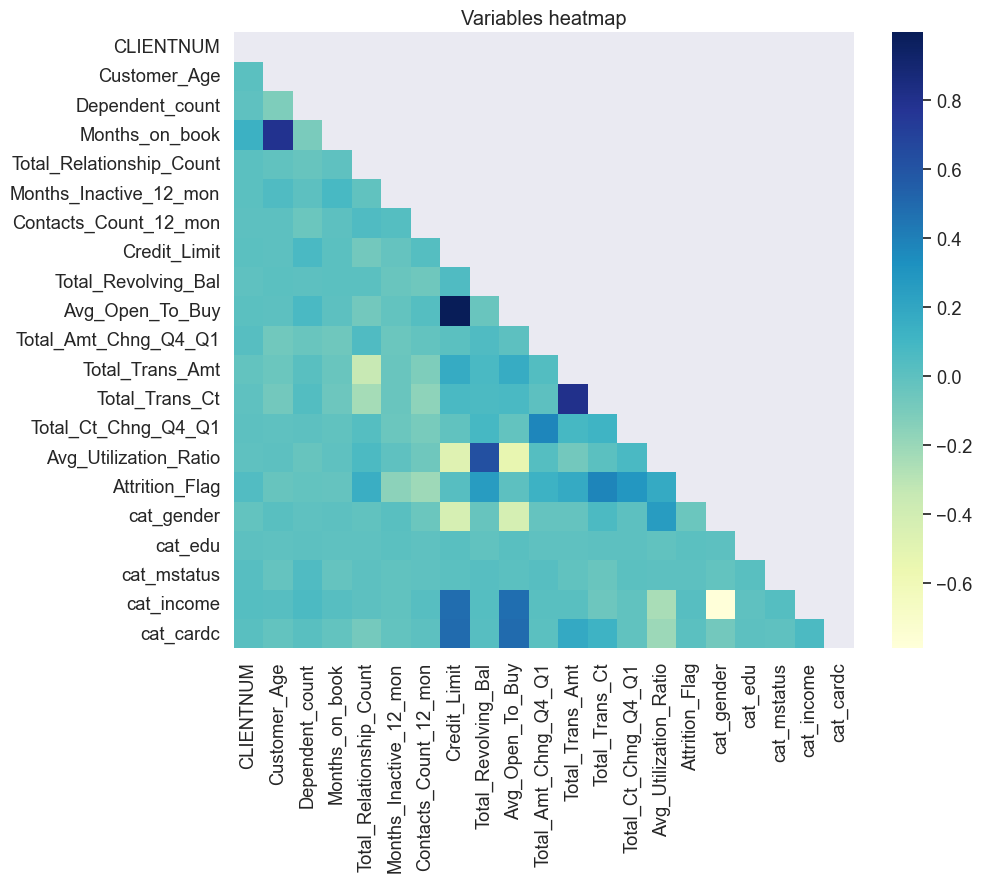

In [25]:
sns.set(font_scale=1.2)

# Correlation matrix
corr_matrix = data_cat.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 8))

# heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=False, mask=mask)

# Titles and labels conf,
plt.title('Variables heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Doesn't seem to be a variable particularly correlated with the flag.

# Using SMOTE.

I use SMOTE (Synthetic Minority Over-sampling Technique) to balance the data.

In [26]:
X=data_cat.drop('Attrition_Flag',axis=1)
y=data_cat["Attrition_Flag"]

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)

In [28]:
print(X_resampled.shape)

(13602, 20)


In [29]:
print(X_resampled.columns)

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'cat_gender', 'cat_edu', 'cat_mstatus', 'cat_income', 'cat_cardc'],
      dtype='object')


In [30]:
print(y_resampled.shape)

(13602,)


In [31]:
y_resampled.value_counts()

1    6801
0    6801
Name: Attrition_Flag, dtype: int64

Text(0.5, 1.0, 'Count of attrition')

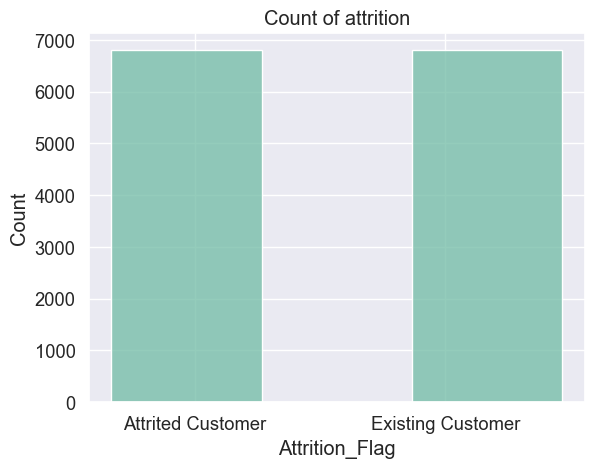

In [32]:
sns.histplot(data=y_resampled, bins=2, binwidth=0.45, color='#71bca5')
plt.xticks([0.25, 1], ['Attrited Customer', 'Existing Customer'])
plt.title('Count of attrition')

In [33]:
data=X_resampled
data['Flag']=y_resampled
data.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,cat_gender,cat_edu,cat_mstatus,cat_income,cat_cardc,Flag
0,713071383,54,1,36,1,3,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1,1,1,1,1,1
1,714246333,58,4,48,1,4,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,1,2,2,1,1,0
2,718206783,45,4,36,6,1,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1,1,1,2,2,1
3,721096983,34,2,36,4,3,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1,3,1,2,1,1
4,720028683,49,2,39,5,3,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1,2,2,3,1,1


In [34]:
correlation_matrix = data.corr()
match_correlations = correlation_matrix['Flag']
most_positively_correlated = round(match_correlations.sort_values(ascending=False), 2).head(11)[1:10]
most_negatively_correlated = round(match_correlations.sort_values(ascending=True),2).head(11)[1:11]

In [35]:
print(most_positively_correlated.head())

Total_Trans_Ct              0.56
Total_Ct_Chng_Q4_Q1         0.40
Total_Revolving_Bal         0.36
Total_Relationship_Count    0.31
Total_Trans_Amt             0.28
Name: Flag, dtype: float64


In [36]:
print(most_negatively_correlated.head())

Months_Inactive_12_mon   -0.09
Customer_Age             -0.02
Months_on_book            0.00
Avg_Open_To_Buy           0.02
Credit_Limit              0.06
Name: Flag, dtype: float64


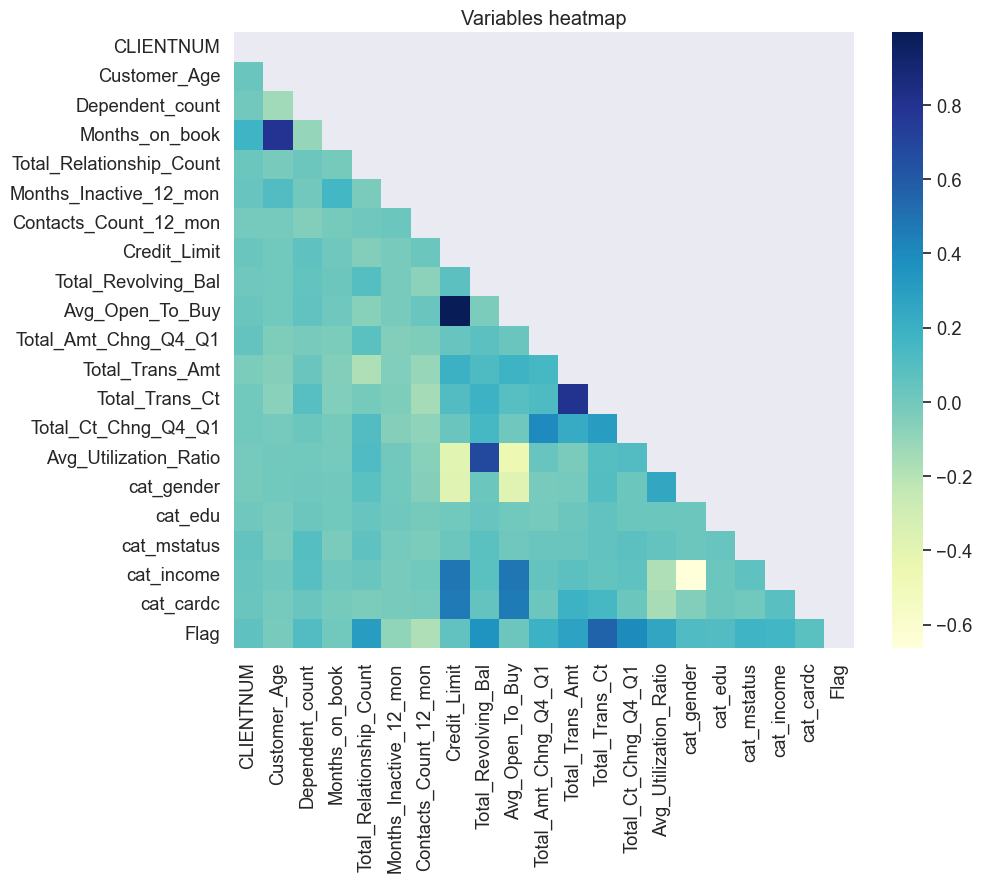

In [37]:
sns.set(font_scale=1.2)

# Correlation matrix
corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 8))

# heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=False, mask=mask)

# Titles and labels conf,
plt.title('Variables heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

It doesn't seem to be a variable particularly correlated with the flag when balancing the data, so I'll initially take all the variables.

# Using random forest.

In [38]:
X=data.drop("Flag",axis=1)
y=data['Flag']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=42)

In [43]:
y_pred = rf.predict(X_test)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1379
           1       0.97      0.96      0.97      1342

    accuracy                           0.97      2721
   macro avg       0.97      0.97      0.97      2721
weighted avg       0.97      0.97      0.97      2721



 We can see the model performs quite well when it comes to making the predictions. However, I am going to try to optimize the parameters to see if I can improve the value of f1.

## Checking the importance of each variable.

In [45]:
feature_list = list(X_resampled.columns)
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(X, round(importance, 2)) for X, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Total_Trans_Ct       Importance: 0.26
Variable: Total_Trans_Amt      Importance: 0.17
Variable: Total_Ct_Chng_Q4_Q1  Importance: 0.1
Variable: Total_Revolving_Bal  Importance: 0.09
Variable: Total_Relationship_Count Importance: 0.07
Variable: Total_Amt_Chng_Q4_Q1 Importance: 0.05
Variable: Customer_Age         Importance: 0.03
Variable: Avg_Open_To_Buy      Importance: 0.03
Variable: Avg_Utilization_Ratio Importance: 0.03
Variable: CLIENTNUM            Importance: 0.02
Variable: Months_on_book       Importance: 0.02
Variable: Months_Inactive_12_mon Importance: 0.02
Variable: Contacts_Count_12_mon Importance: 0.02
Variable: Credit_Limit         Importance: 0.02
Variable: cat_mstatus          Importance: 0.02
Variable: cat_income           Importance: 0.02
Variable: Dependent_count      Importance: 0.01
Variable: cat_gender           Importance: 0.01
Variable: cat_edu              Importance: 0.01
Variable: cat_cardc            Importance: 0.0


With this analysis, I would only eliminate the cat_cardc variable that is associated with the category of the user's card.

## Checking the n_estimators (amount of trees).

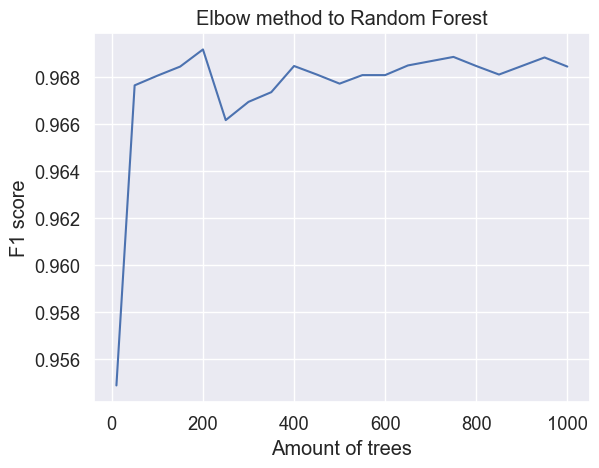

In [46]:
from sklearn.metrics import f1_score
num_trees = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 
             600, 650, 750, 800, 850, 900, 950, 1000]

# List of f1 scores
scores = []

# Training the model to each n_estimators value and its f1 score 
for n in num_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

# Plotting n_estimators Vs number of trees.
plt.plot(num_trees, scores)
plt.xlabel('Amount of trees')
plt.ylabel('F1 score')
plt.title('Elbow method to Random Forest')
plt.show()

From this analysis we can see that initially the score increases as the number of trees increases, and then the behavior tends to stabilize.

## Checking the max_depth (amount of steps)

In [47]:
from sklearn.model_selection import GridSearchCV

# Defining the parameters
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [150, 200, 400, 500, 600]
}

# Instantiating the model
rf = RandomForestClassifier(random_state=42)

# Instantiating the object GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1_weighted')

# Ajusting the model to the training data
grid_search.fit(X_train, y_train)

# Printing the best parameters
print("Best parameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Score F1:", f1_score(y_test, y_pred, average='weighted'))


Best parameters: {'max_depth': 20, 'n_estimators': 600}
Score F1: 0.9694908203328549


## Retesting the model.

In [48]:
data1=data.drop(['cat_cardc'],axis=1)

In [49]:
X=data1.drop("Flag",axis=1)
y=data1['Flag']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
rf = RandomForestClassifier(n_estimators=400, max_depth=20, random_state=42)

In [52]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=400, random_state=42)

In [53]:
y_pred = rf.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1379
           1       0.98      0.96      0.97      1342

    accuracy                           0.97      2721
   macro avg       0.97      0.97      0.97      2721
weighted avg       0.97      0.97      0.97      2721



As we can see it is possible to optimize the parameters and variables. This improvement in the prediction of 0 is due to an improvement in the positives that are correctly identified (an increase in recall).

# Running the model on testing data.

In [55]:
new_data=pd.read_csv("supply_chain_test.csv")

In [56]:
new_data.head()

,test_idx,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,719455083,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
1,1,773503308,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
2,2,715452408,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
3,3,711264033,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
4,4,718943508,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584


In [57]:
map_value={'F':1,'M':0}
new_data['cat_gender']=new_data['Gender'].replace(map_value)
value_map = {'Unknown': 1, 'High School': 2, 'Graduate': 3,'Doctorate':4,'Post-Graduate':5,'Uneducated':6
            ,'College':7}
new_data['cat_edu'] = new_data['Education_Level'].replace(value_map)
value_map={'Single':1, 'Married':2, 'Divorced':3, 'Unknown':4}
new_data["cat_mstatus"]=new_data['Marital_Status'].replace(value_map)
map_value={'Unknown':1, 'Less than $40K':2, '$40K - $60K':3, '$60K - $80K':4,
       '$80K - $120K':5, '$120K +':6}
new_data['cat_income']=new_data['Income_Category'].replace(map_value)
map_value={'Blue':1, 'Gold':2, 'Silver':3, 'Platinum':4}
new_data['cat_cardc']=new_data['Card_Category'].replace(map_value)

In [58]:
new_data1=new_data.drop(['test_idx','Gender','Education_Level', 
'Marital_Status','Card_Category', 'Income_Category','cat_cardc'],axis=1)
new_data1.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,cat_gender,cat_edu,cat_mstatus,cat_income
0,719455083,48,3,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504,1,6,1,2
1,773503308,59,1,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716,0,6,1,2
2,715452408,37,2,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569,1,3,3,2
3,711264033,47,3,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317,0,4,3,3
4,718943508,42,3,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584,0,1,1,5


In [59]:
new_data1.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'cat_gender', 'cat_edu', 'cat_mstatus', 'cat_income'],
      dtype='object')

In [60]:
y_predict=rf.predict(new_data1)

In [61]:
print(y_predict[:6])

[1 1 1 1 0 1]


In [62]:
import json

y_predict_list = y_predict.tolist()
# Creating the dict
json_dict = {"target": {}}
for i, val in enumerate(y_predict_list):
    json_dict["target"][str(i)] = val

# Transforming dict into JSON.
json_y_predict = json.dumps(json_dict)

# Printing JSON
print(json_y_predict)


{"target": {"0": 1, "1": 1, "2": 1, "3": 1, "4": 0, "5": 1, "6": 1, "7": 1, "8": 1, "9": 0, "10": 1, "11": 1, "12": 1, "13": 0, "14": 1, "15": 1, "16": 1, "17": 1, "18": 1, "19": 1, "20": 1, "21": 1, "22": 1, "23": 1, "24": 1, "25": 1, "26": 1, "27": 1, "28": 0, "29": 1, "30": 1, "31": 0, "32": 1, "33": 1, "34": 0, "35": 1, "36": 1, "37": 1, "38": 1, "39": 1, "40": 0, "41": 1, "42": 1, "43": 1, "44": 1, "45": 1, "46": 1, "47": 1, "48": 1, "49": 1, "50": 0, "51": 1, "52": 1, "53": 1, "54": 1, "55": 1, "56": 1, "57": 1, "58": 1, "59": 1, "60": 1, "61": 1, "62": 0, "63": 1, "64": 1, "65": 0, "66": 0, "67": 1, "68": 1, "69": 1, "70": 0, "71": 0, "72": 1, "73": 1, "74": 1, "75": 1, "76": 1, "77": 1, "78": 1, "79": 1, "80": 1, "81": 0, "82": 1, "83": 1, "84": 1, "85": 1, "86": 1, "87": 1, "88": 1, "89": 1, "90": 1, "91": 1, "92": 1, "93": 1, "94": 1, "95": 1, "96": 0, "97": 0, "98": 1, "99": 1, "100": 1, "101": 1, "102": 1, "103": 1, "104": 0, "105": 1, "106": 1, "107": 1, "108": 1, "109": 1

In [63]:
with open('predicciones.json', 'w') as f:
    json.dump(json_dict, f)